# CHSH Inequaliy Homework

## PLEASE READ ALL SECTIONS

## Overview
In this tutorial, you will run an experiment on a quantum computer to demonstrate the violation of the CHSH inequality.

The CHSH (or Bell) Inequality, named after the authors Clauser, Horne, Shimony, and Holt, is used to experimentally prove Bell's theorem (1969). This theorem asserts that local hidden variable theories cannot account for some consequences of entanglement in quantum mechanics. The violation of the CHSH inequality is used to show that quantum mechanics is incompatible with local hidden-variable theories. This is an important experiment for understanding the foundation of quantum mechanics.

The 2022 Nobel Prize for Physics was awarded to Alain Aspect, John Clauser and Anton Zeilinger in part for their pioneering work in quantum information science, and in particular, for their experiments with entangled photons demonstrating violation of Bell’s inequalities.

![Image][3]

You can learn more about it in this [video][4]

## Objectives
* Create an open (free) account for [IBM Quantum Learning][1]
* Learn how to use the [Qiskit API][2] to build and run simple circuits
* Use circuit job results to justify the violation of the CHSH inequality

## Grading
You are expected to write your own code. It is acceptable to find and use code from the [Qiskit API][2] and [IBM Quantum Learning][1] webpages, but **it is strictly prohibited to use code obtained from other sources**, especially other students. You are also expected to write descriptive comments explaining what your code is trying to accomplish and why.

These are the following gradable items and their weights
1. Building Circuits (40%)
    1. Entangling Qubits (12%)
        - Build Bell Circuit (10%)
        - Draw Bell Circuit (2%)
    2. Adding View Measurements (28%)
        - Building Experiments (20%)
        - Plotting View Circuits (8%)
2. Running Circuits (40%)
    1. Create Plotting Function (5%)
    2. Run Circuit on Ideal Simulator (10%)
    3. Run Circuit on Noisy Simulator (10%)
        - Get a Backend (1%)
        - Creating a Noise Model (2%)
        - Transpile Circuits to Backend (2%)
        - Run and Plot Results (5%)
    4. Run Circuit on IBM Quantum Computer (15%)
        - Parallelize Experiments (7%)
        - Transpile Circuit (2%)
        - Run Circuit (2%)
        - Plot Results (4%)
        
3. Calculations (20%)
    1. Calculating Expectation Values (8%)
        - Function to Calculate Expectation Value (1%)
        - Calculate Expectation Value for Ideal Simulator (2%)
        - Calculate Expectation Value for Noisy Simulator (2%)
        - Calculate Expectation Value for IBM Quantum Computer (3%)
    2. Calculating CHSH Values (12%)
        - Function to Calculate CHSH Value (2%)
        - Calculate CHSH Value for Ideal Simulator (3%)
        - Calculate CHSH Value for Noisy Simulator (3%)
        - Calculate CHSH Value for IBM Quantum Computer (4%)
        

[1]: https://learning.quantum.ibm.com/
[2]: https://docs.quantum.ibm.com/api/qiskit
[3]: https://i.ytimg.com/vi/9OM0jSTeeBg/maxresdefault.jpg
[4]: https://www.youtube.com/watch?v=9OM0jSTeeBg

### Environment Verification
Before you proceed, please verify your kernel is running the **Python 3.11** environment you created with `pip install -r requirements.txt`<br><br>
If you don't see your environment in the kernel list, you need to add it using the terminal and relaunch jupyter. You can add your environment to interactive python using this command<br><br> `ipython kernel install --user --name=ENV_NAME` (replacing `ENV_NAME`)<br><br>
After you've selected the correct environment, run this next cell, but do NOT edit it in any way! If no errors pop up, then your environment should be able to run this notebook with ease.

In [50]:
# DO NOT EDIT THIS CELL
n = 20

import sys
print("python", sys.version)

import numpy
print("numpy".ljust(n), numpy.__version__)

import matplotlib
print("matplotlib".ljust(n), matplotlib.__version__)

import qiskit
print("qiskit".ljust(n), qiskit.__version__)

import qiskit_aer
print("qiskit_aer".ljust(n), qiskit_aer.__version__)

import qiskit_ibm_runtime
print("qiskit_ibm_runtime".ljust(n), qiskit_ibm_runtime.__version__)

python 3.9.6 (default, Feb  3 2024, 15:58:27) 
[Clang 15.0.0 (clang-1500.3.9.4)]
numpy                2.0.2
matplotlib           3.9.2
qiskit               1.2.4
qiskit_aer           0.15.1
qiskit_ibm_runtime   0.32.0


### Library Imports
We will need these libraries, classes, and utilities to write and run code for this homework. There should be no import errors if everything is installed correctly.

In [51]:
# General
import numpy as np

# Plotting routines
import matplotlib.pyplot as plt

# Qiskit imports
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Qiskit Aer imports
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

# Qiskit Runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService, Session, SamplerV2 as Sampler, SamplerOptions

# **Section 1: Building Circuits (40%)**
This section is dedicated to building quantum circuits using Qiskit

## Part 1: Creating Entangled Qubits (12%)
These experiments will require applying rotations and measurements on entangled qubits, so let's start by writing a Python function that will create and return a 2-qubit 2-cbit circuit that applies a Hadarmard gate on the first qubit and a CNOT targetting the second qubit controlled by the first qubit. An optional barrier can be added to make visualization cleaner.

### Building a Bell Circuit (10%)
Fill in the Python function `BellCircuit` with Qiskit code that will return a quantum circuit created from `qreg` and `creg` that applies a Hadarmard gate on the first qubit and a CNOT targetting the second qubit controlled by the first qubit. An optional barrier can be added to make visualization cleaner. Do NOT perform any measurements at this stage!

In [52]:
# Python function that creates a maximally entangled bell state
def BellCircuit(qreg_name='q', creg_name='c') -> QuantumCircuit:
    qreg_q = QuantumRegister(2, qreg_name)
    creg_c = ClassicalRegister(2, creg_name)
    
    # YOUR CODE BELOW
    circuit = QuantumCircuit(qreg_q, creg_c)

    circuit.h(qreg_q[0])

    circuit.cx(qreg_q[0], qreg_q[1])


    return circuit

    # YOUR CODE ABOVE

bell = BellCircuit()

### Drawing the Circuit (2%)
Use Qiskit API to `draw` the bell circuit using the matplotlib style

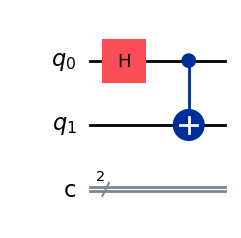

In [53]:
# YOUR CODE BELOW
bell.draw('mpl')

## Part 2 Adding View Measurements (28%)
Now that we have a maximally entangled bell state, let us measure it in 4 different views *AB*, *Ab*, *aB*, and *ab*. 
* *AB*: Rotate qubit 1 by around the Y-axis by $-\frac{\pi}{4}$ measuring both qubits in the Z basis
* *Ab*: Rotate qubit 1 by around the Y-axis by $\frac{\pi}{4}$ measuring both qubits in the Z basis
* *aB*: Rotate qubit 1 by around the Y-axis by $-\frac{\pi}{4}$ measuring qubit 0 in the X basis and qubit 1 in the Z basis
* *ab*: Rotate qubit 1 by around the Y-axis by $\frac{\pi}{4}$ measuring qubit 0 in the X basis and qubit 1 in the Z basis

### Building Experiments (20%)
Fill in the Python function `MeasureWithView` with Qiskit code that will create these different view circuits leveraging the previous `BellCircuit` function, then plot them using the given code below.

In [54]:
# Write code that will create circuits for AB, Ab, aB, and ab views
views = ("AB","Ab","aB","ab")


def MeasureWithView(circuit: QuantumCircuit, view: str):
     # Based on the provided view, apply rotations and measurements to the qubits
    if view == "AB":
        circuit.ry(-np.pi / 4, circuit.qubits[1])

    elif view == "Ab":
        circuit.ry(np.pi / 4, circuit.qubits[1])
        
    elif view == "aB":
        circuit.ry(-np.pi / 4, circuit.qubits[1])
        circuit.h(circuit.qubits[0]) 
       
    elif view == "ab":
        circuit.ry(np.pi / 4, circuit.qubits[1])
        circuit.h(circuit.qubits[0]) 

    circuit.measure(circuit.qubits[0], circuit.clbits[0])
    circuit.measure(circuit.qubits[1], circuit.clbits[1])
    
    return circuit


circuits = [MeasureWithView(BellCircuit('q'+view,'c'+view),view) for view in views]

### Plotting the Different View Circuits (8%)
Fill in the `PlotCircuits` Python function with code that will create a figure containing a drawing of each view circuit by calling its `draw` method. Check that your circuits make sense and appear as described in the instructions.

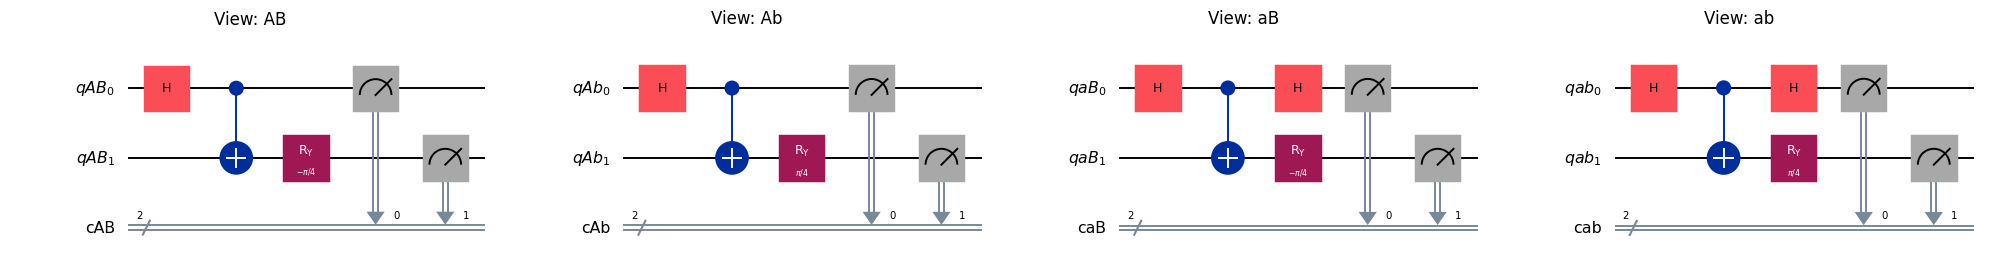

In [55]:
# Plot the circuits into 1 figure
def PlotCircuits(*circuits: QuantumCircuit):
    fig, axs = plt.subplots(1, len(circuits), figsize=(20, 5))
    i = 0
    for ax, circuit in zip(axs, circuits):
        # print(circuit.name)
        circuit.draw('mpl', ax=ax) 
        ax.set_title(f"View: {views[i]}")
        i+=1

    plt.tight_layout()  
    plt.show() 

PlotCircuits(*circuits)

# **Section 2: Running Circuits (40%)**
This next section is dedicated to running your quantum circuits on both ideal and noisy simulators, and finally plotting the results.

## Part 1: Creating a Plotting Function (5%)
Fill the `PlotCircuitResults` Python function with code that will utilize `plot_histogram` to visualize the counts of each observable from a circuit job. There is an example dictionary you should test with.

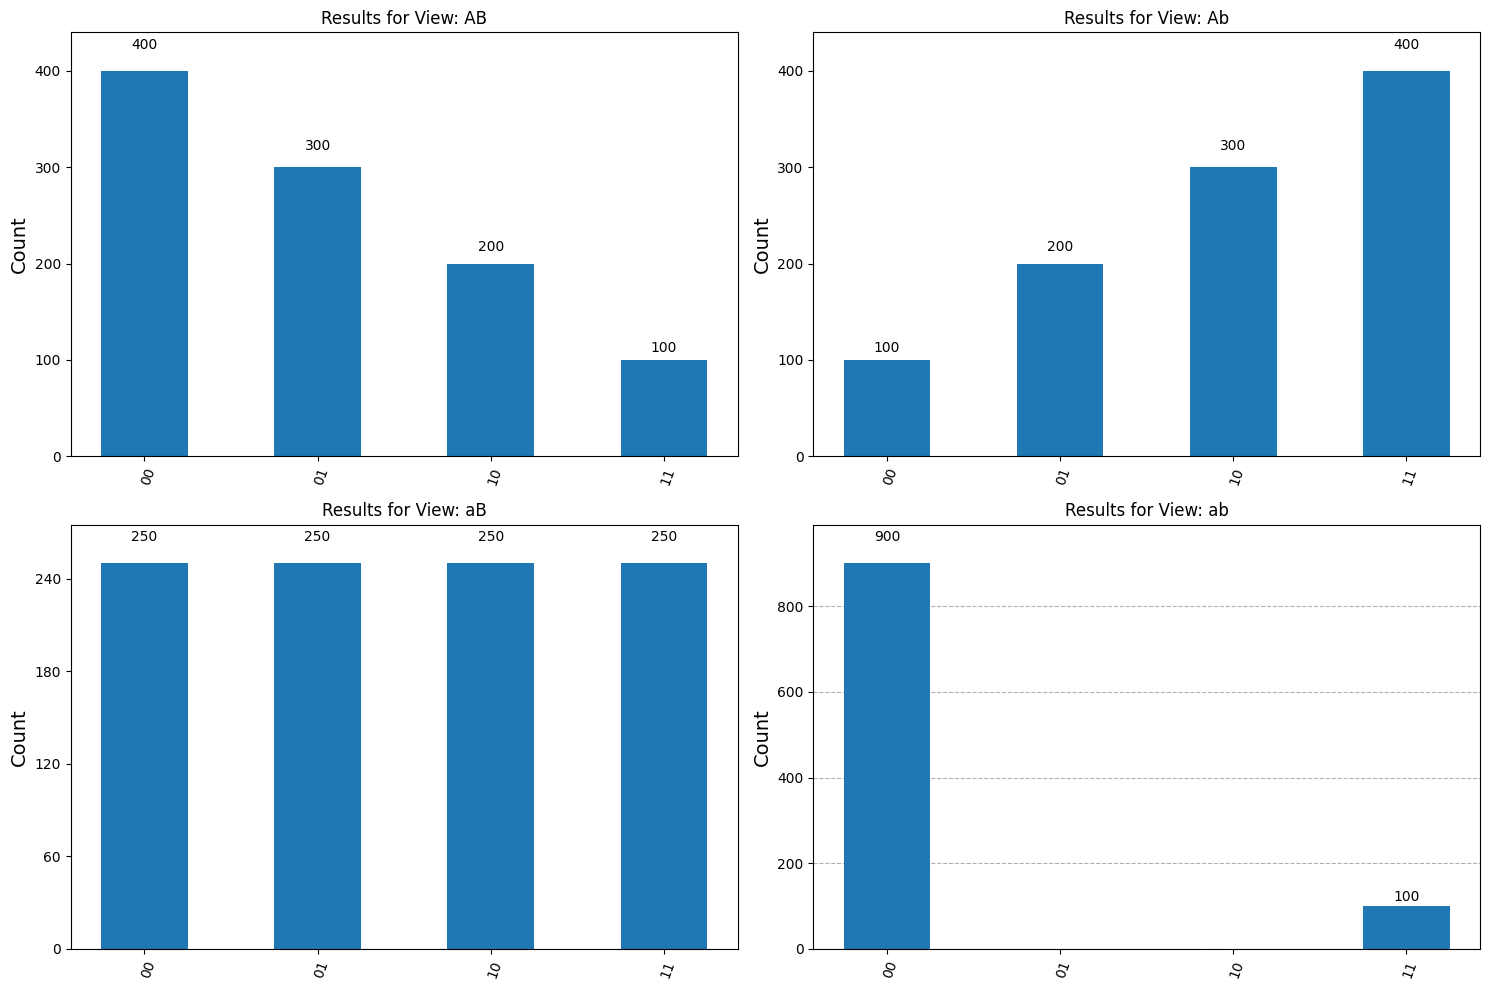

In [56]:
# Plot the circuits into 1 figure
def PlotCircuitResults(circuit_results: dict):
    num_views = len(circuit_results)
    num_rows = int(num_views**0.5)
    num_cols = num_rows if num_views % num_rows == 0 else num_rows + 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
    axes = axes.flatten() 

    for i, (view, counts) in enumerate(circuit_results.items()):
        plot_histogram(counts, title=f"Results for view: {view}", ax=axes[i])
        axes[i].set_title(f"Results for View: {view}")  # Set the title for the subplot

    plt.tight_layout()
    plt.show()

PlotCircuitResults({
    "AB":{"00": 400, "01": 300, "10": 200, "11": 100},
    "Ab":{"00": 100, "01": 200, "10": 300, "11": 400},
    "aB":{"00": 250, "01": 250, "10": 250, "11": 250},
    "ab":{"00": 900, "01": 000, "10": 000, "11": 100},
})

## Part 2: Running Circuits on an **Ideal Simulator** (10%)
Use Qiskit's [AerSimulator][1] to simulate 1000 shots for each view circuit, then use the `PlotCircuitResults` function to plot the counts from each view circuit job result.

[1]: https://qiskit.github.io/qiskit-aer/stubs/qiskit_aer.AerSimulator.html

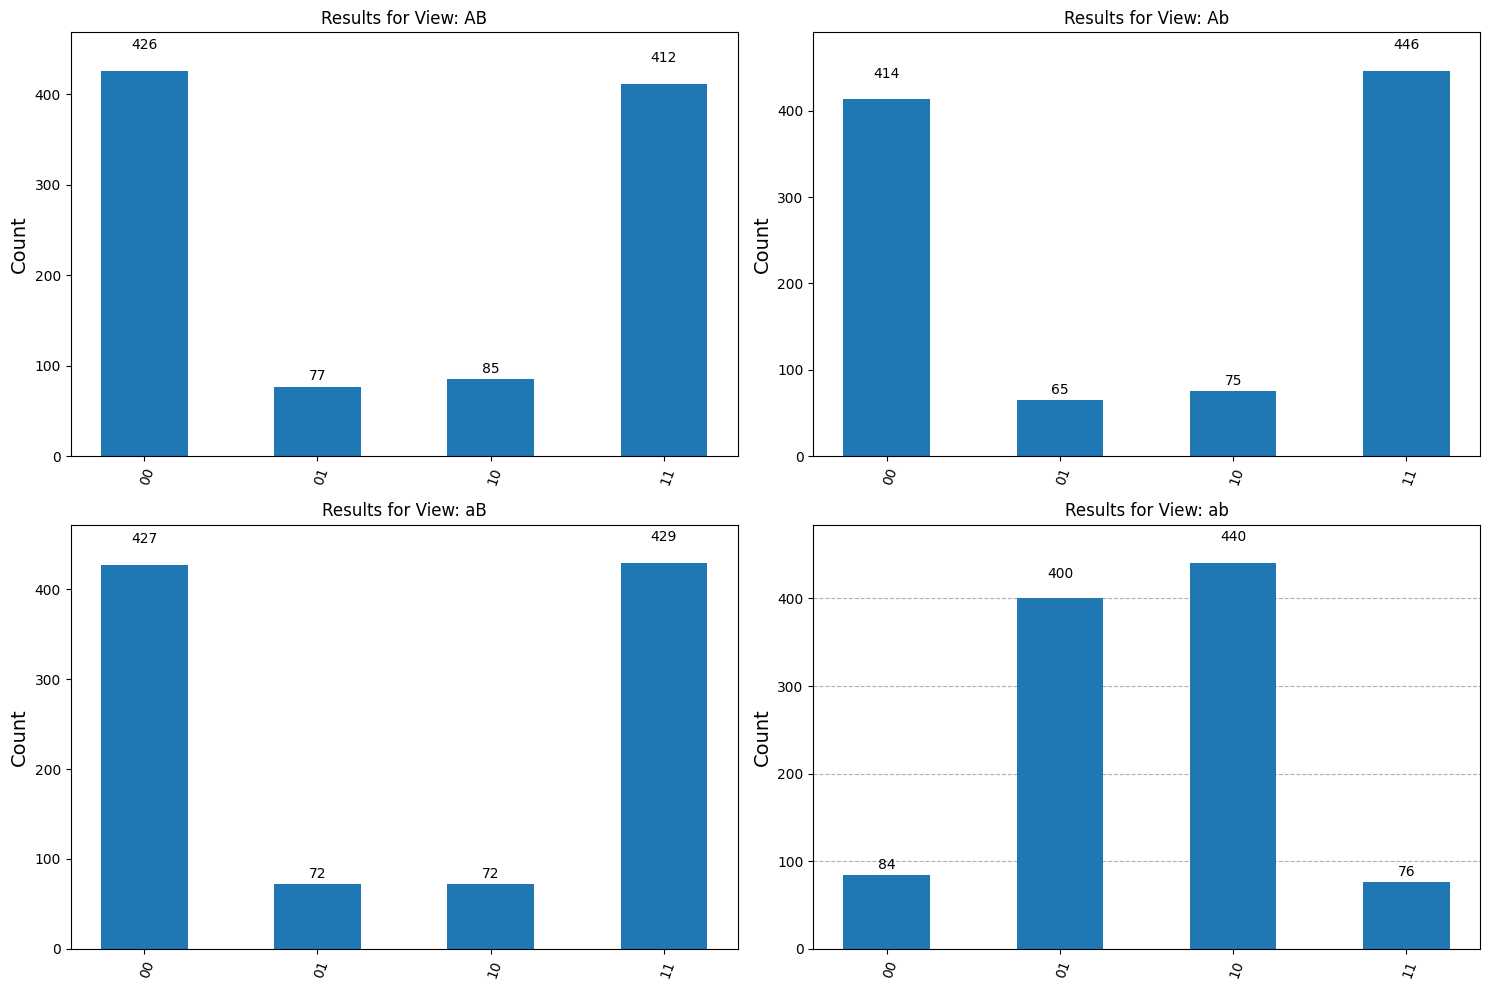

In [57]:
# YOUR CODE BELOW

simulator = AerSimulator()

views = ['AB', 'Ab', 'aB', 'ab']

results_ideal = {}

for view in views:
    circuit = MeasureWithView(BellCircuit(),view) 
    job = simulator.run(circuit, shots=1000)  
    results_ideal[view] = job.result().get_counts() 

PlotCircuitResults(results_ideal)

## Part 3: Running Circuits on an **IBM Noisy Simulator** (10%)
Use Qiskit's AerSimulator and NoiseModel to simulate 1000-shot runs of each view circuit as if they were ran on an 127-qubit IBM quantum computer, then use the `PlotCircuitResults` function to plot the quasi-dists from each view circuit job result.

### Loading Your QiskitRuntimeService Account
To request a backend from IBM, you need an IBM Quantum account synced to this notebook. For a service (like IBM) to track users jobs and utilization of their hardware resources, Qiskit uses an API token which is tied to your IBM Quantum account. It is critical to keep it secret because any device could use it and use QPU time under your account which would drain your credits / computing funds.

In [58]:
# Copy your token from the IBM Quantum Platform, run this cell, then delete the token.
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="9199b5043381bf71eda4b90f02290e9ad349e1467946d68e8d8ae3e1daa35386930d13b21d73403c7b7dc8cd7c8875f648b90cb4e6f1843383edb9bb2c5dde29",
    set_as_default=True,
    overwrite=True,
)

Once you run the cell above, you only need to run the cell below to get the service because your API token is now safely stored on your device, but keep in mind if you run this notebook on another device, the saved account may be different.

In [59]:
# Load saved credentials
service = QiskitRuntimeService()

### Getting a Backend (1%)
Use the [QiskitRuntimeService][1] to request a real 127-qubit quantum computer backend from the `ibm_quantum` channel.
<br>**PLEASE DO NOT EXPLICITLY WRITE YOUR API TOKEN IN THIS NOTEBOOK, BUT RATHER SAVE YOUR ACCOUNT**

[1]: https://github.com/Qiskit/qiskit-ibm-runtime?tab=readme-ov-file#access-your-ibm-quantum-backends

In [60]:
# YOUR CODE BELOW
print(service.backends())
backend = service.backend('ibm_brisbane')

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyiv')>, <IBMBackend('ibm_sherbrooke')>]


Run the cell below to open a web browser to view the backend you requested

In [357]:
import webbrowser
webbrowser.open(f"https://quantum.ibm.com/services/resources?system={backend.name}")

True

### Creating a Noise Model (2%)
Create a `NoiseModel` using the backend you just requested, then create an `AerSimulator` using that noise model.

In [61]:
# YOUR CODE BELOW
noise_model = NoiseModel.from_backend(backend)
noisy_simulator = AerSimulator(noise_model=noise_model)

### Transpile Circuit for Noisy Backend (2%)
Use the `general_preset_pass_manager` to create a transpiler for your backend, then transpile your circuits.

In [62]:
# YOUR CODE BELOW
from qiskit.compiler import transpile, assemble
from qiskit.transpiler import PassManager, CouplingMap, Layout

transpiled_circuit = transpile(circuit, backend, optimization_level=3)

### Run Transpiled Circuits and Plot Results (5%)
Run the transpiled circuits using the noisy simulator, then call `PlotCircuitResults` plot the counts.

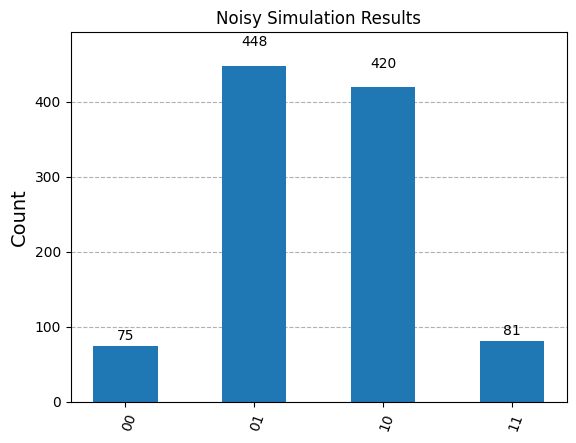

In [63]:
# YOUR CODE BELOW
job = noisy_simulator.run(transpiled_circuit, shots=1024)
result = job.result()

counts = result.get_counts(0)
plot_histogram(counts, title="Noisy Simulation Results")

## Part 4: Running Circuits on an IBM Quantum Computer (15%)
Running a circuit on IBM's quantum hardware is free but limited by Quantum Processing Unit (QPU) time per month. As such, caution should be taken before sending jobs to a real device. If the job is not set up correctly, it can easily result in a waste of QPU time.
<br><br>
When a job is sent for execution, it enters a job queue because a QPU can only service one job at a time and thousands of users are submitting jobs daily. QPU time is only accumulated when the job starts running after it has finished queueing.


### Optimizing Circuits for Real Backend
We have 4 experiments that utilize 2 qubits each, but our real backend uses quantum hardware that supports over 100 qubits. To be more efficient with that computing resource, we should parallelize some shots by using more qubits to save QPU time.

To achieve this, we will create a new 8-qubit circuit that runs all 4 experiments simulaneously on disjoint pairs of qubits. This will cut our QPU usage down by 75% since we are effectively parallelizing the experiments. Just run the code below to see how this works.

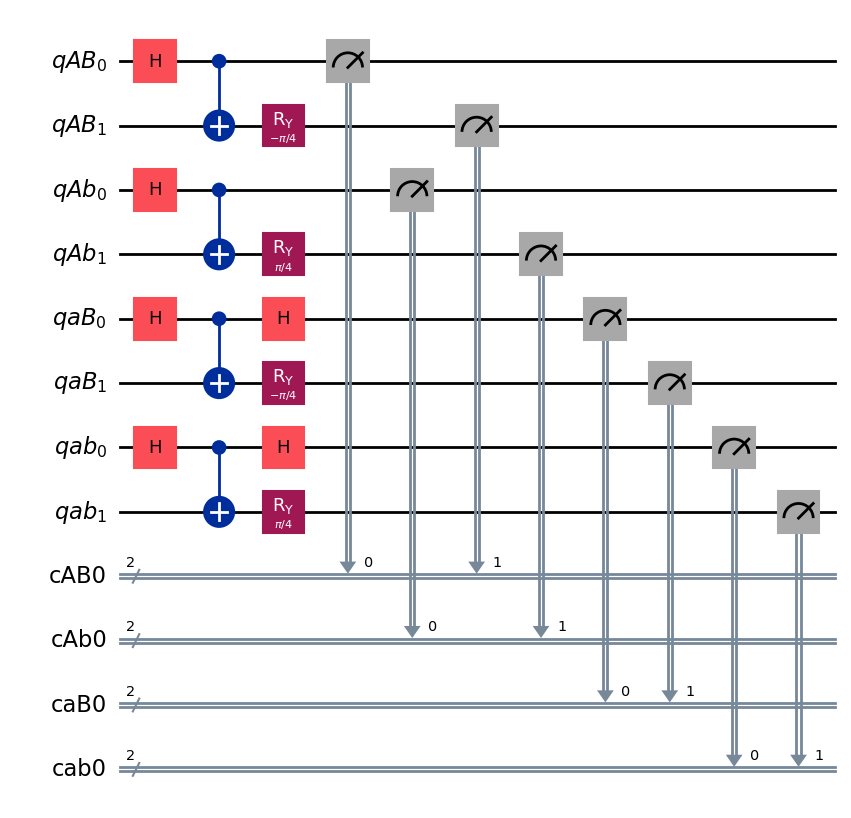

In [64]:
# This code creates a wider QuantumCircuit object that concatenates each view experiment circuit
circ_combined = QuantumCircuit()

i = 0
for j, view in enumerate(views):
    circuit = MeasureWithView(BellCircuit('q'+view,'c'+view+'0'),view)
    circ_combined.add_register(circuit.qregs[0])
    circ_combined.add_register(circuit.cregs[0])
    circ_combined.compose(circuit,qubits=range(i,i+circuit.num_qubits),clbits=range(i,i+circuit.num_clbits),inplace=True)
    i += circuit.num_qubits

circ_combined.draw('mpl')

### Parallelizing Copies of Experiments (7%)
Now we have a circuit that will execute all 4 experiments side by side, but this uses only 8 qubits. We can still utilize more of the hardware resources by creating copies of this circuit across the entire qubit topology.<br><br>
Fill in the rest of the code to create one wide, shallow circuit containing several copies of each measurement view experiment. Be sure to provide distict names for the classical and quantum registers in each experiment circuit. This will make it easier to process later. You can refer to the previous code cell for guidance.

In [73]:
num_qubits = 8 * ((backend.num_qubits // 5 * 4) // 8)
circ_real = QuantumCircuit()
for i in range(0,num_qubits,8):
    for j, view in enumerate(views):
        circuit = MeasureWithView(BellCircuit(f'q{view}{i}', f'c{view}{i}'), view)
        circ_real.add_register(circuit.qregs[0])
        circ_real.add_register(circuit.cregs[0])
        circ_real.compose(circuit, qubits=range(i, i + circuit.num_qubits), clbits=range(i, i + circuit.num_clbits), inplace=True)

circ_real.draw('mpl')


### Transpile the Circuit for Real Backend (2%)
Use the `general_preset_pass_manager` using level 2 optimization to create a transpiler for your backend, then transpile your circuits. Print the depth of your circuit. The depth should be fairly shallow after optimization (less than 30 layered operations).

In [74]:
circ_real.measure_all()
pass_manager = generate_preset_pass_manager(
    optimization_level=2, 
    backend=backend
)
print(pass_manager)
transpiled_circuit = pass_manager.run(circ_real)
print(transpiled_circuit.depth())
num_qubits = transpiled_circuit.num_qubits
print(num_qubits)

45
127


### Run the Transpiled Circuit (2%)
Run the transpiled circuit on real quantum hardware using the `Sampler`. Note that when you run the job, you will have to wait for the result, so it is suggested you do not call `result()` right away but rather call `job_id()`

In [ ]:
job = service.job('cwrqrwktdtng0086y82g')
job_id = job.job_id()

In [75]:
# YOUR CODE BELOW
sampler = Sampler(backend)
job = sampler.run([transpiled_circuit], shots = 124 )

job_id = job.job_id()

print(f"Job ID: {job_id}")

Job ID: cwrr3xztdtng0086yasg


In [78]:
print(f"Job ID: {job_id}")

Job ID: cwrr3xztdtng0086yasg


### Checking the Job Status
You can run `job.status()` several times to monitor your job. Only when it returns `DONE` will the `job.result()` be ready.

In [70]:
# Run this cell as many times as you like. Once the job is DONE, then run grab the result
job.status()

'DONE'

### Plotting Job Results (4%)
Aggregate the counts from each experiment to their respective view measurement, then use `PlotCircuitResults` to plot the counts.

In [81]:
# I run multiple jobs in IBM So that I check the output on here.
print("Testing")
result = job.result()[0].data
# print(result)
print(result.keys())
print(
    result.cAB0.get_counts()
)
print(
    result.cAB8.get_counts()
)


Testing
dict_keys(['cAB0', 'cAb0', 'caB0', 'cab0', 'cAB8', 'cAb8', 'caB8', 'cab8', 'cAB16', 'cAb16', 'caB16', 'cab16', 'cAB24', 'cAb24', 'caB24', 'cab24', 'cAB32', 'cAb32', 'caB32', 'cab32', 'cAB40', 'cAb40', 'caB40', 'cab40', 'cAB48', 'cAb48', 'caB48', 'cab48', 'cAB56', 'cAb56', 'caB56', 'cab56', 'cAB64', 'cAb64', 'caB64', 'cab64', 'cAB72', 'cAb72', 'caB72', 'cab72', 'cAB80', 'cAb80', 'caB80', 'cab80', 'cAB88', 'cAb88', 'caB88', 'cab88', 'meas'])
{'00': 34, '01': 38, '10': 26, '11': 26}
{'01': 39, '10': 20, '11': 35, '00': 30}


In [88]:
result = job.result()[0]

real_counts = {}
for view in views:
    # print(view)
    # print({f"{q1}{q0}": 0 for q0 in range(2) for q1 in range(2)})
    real_counts[view] = {f"{q1}{q0}": 0 for q0 in range(2) for q1 in range(2)}
    # print(real_counts)
    index = 0
    print(num_qubits//8)
    for i in range(0,num_qubits//8):
        # YOUR CODE BELOW
        # print(i)
        item = "c"+view+str(index)
        index = i*8
        print(item)
        # print(item ," " ,result.data[item].get_counts())
        real_counts[view] = result.data[item].get_counts()



PlotCircuitResults(real_counts)

15
cAB0
cAB0
cAB8
cAB16
cAB24
cAB32
cAB40
cAB48
cAB56
cAB64
cAB72
cAB80
cAB88
cAB96


KeyError: 'Key (cAB96) does not exist in this data bin.'

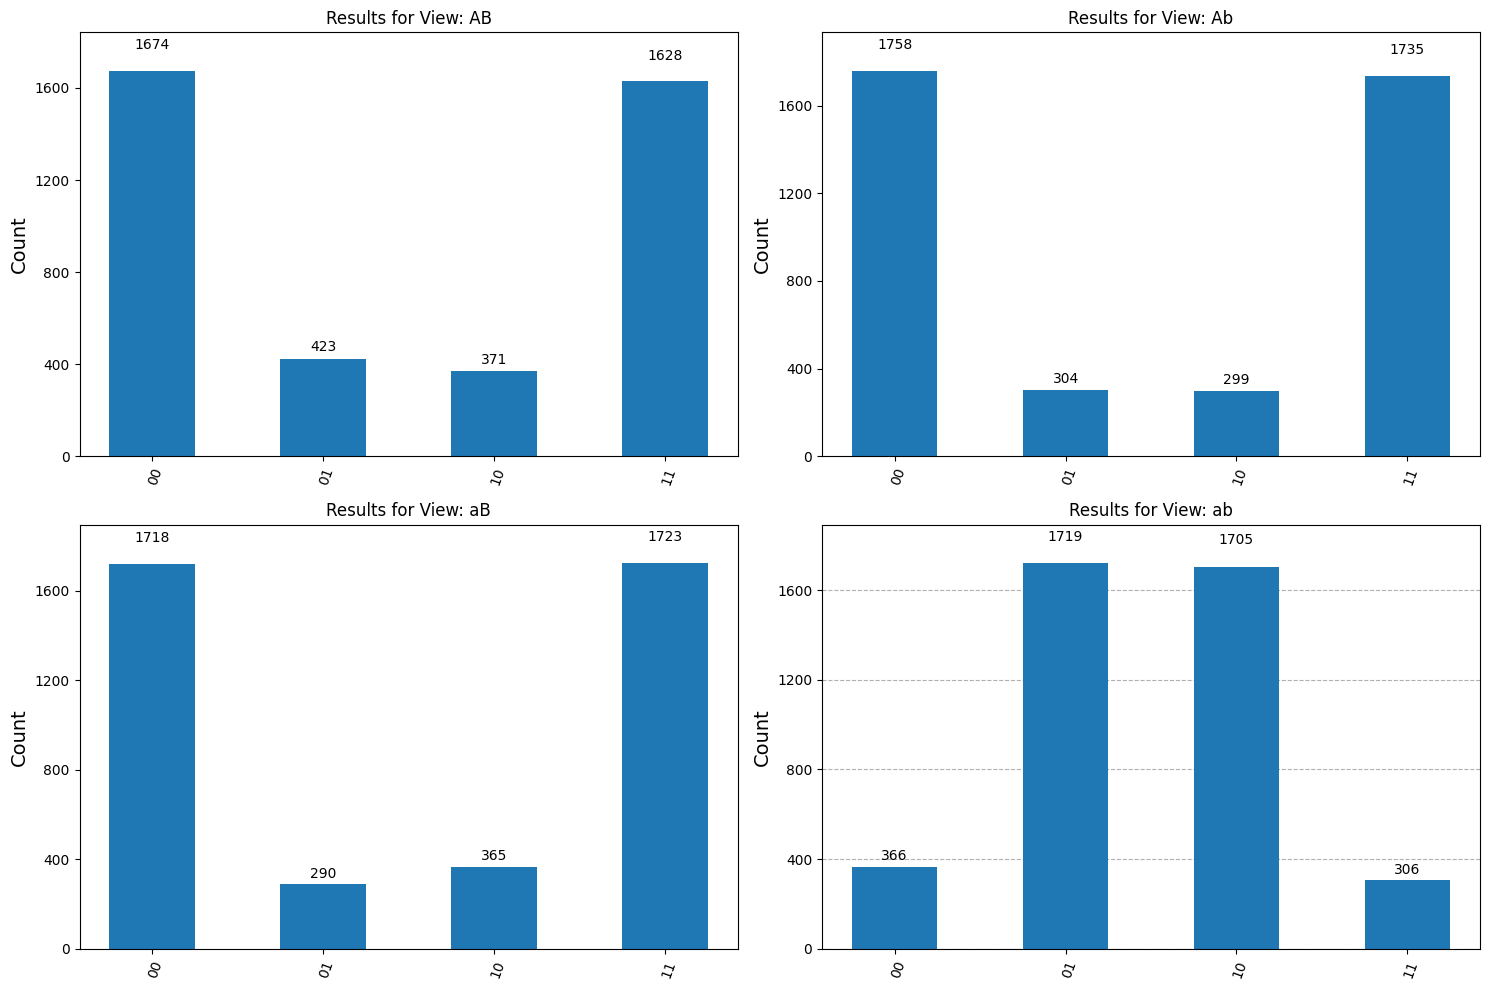

In [454]:
result = job.result()[0]

real_counts = {}
for view in views:
    # print(view)
    # print({f"{q1}{q0}": 0 for q0 in range(2) for q1 in range(2)})
    real_counts[view] = {f"{q1}{q0}": 0 for q0 in range(2) for q1 in range(2)}
    # print(real_counts)
    for i in range(0,num_qubits//8):
        # YOUR CODE BELOW
        # print(i)
        item = "c"+view+"0"
        # print(item ," " ,result.data[item].get_counts())
        real_counts[view] = result.data[item].get_counts()



PlotCircuitResults(real_counts)

# **Section 3: Calculations (20%)**

## Part 1: Calculating Expectaction Values (8%)
Computing the expectation value of the circuit is given by this formula<br><br> $\langle \psi \rangle = P(00) + P(11) - P(01) - P(10)$<br><br> which is the **difference between** the probability of observing both qubits being the **same** and the probability the observations are **different**.

### Writing a Function to Compute Expectaction Values (1%)
Fill in the `ExpectatonValue` Python function with code that will use the counts obtained from a circuit job to compute the expectation value of that circuit view.

In [368]:
def ExpectationValue(counts):
    # YOUR CODE BELOW
    num_shots = sum(counts.values())
    p00 = counts.get('00', 0) / num_shots
    p11 = counts.get('11', 0) / num_shots
    p01 = counts.get('01', 0) / num_shots
    p10 = counts.get('10', 0) / num_shots

    expectation_value = p00 + p11 - p01 - p10
    return expectation_value

### Calculating $\langle AB \rangle$, $\langle Ab \rangle$, $\langle aB \rangle$, and $\langle ab \rangle$ from Jobs ran on an **Ideal Simulator** (2%)
Use the `ExpectationValue` function and the observable counts obtained from running your circuits on an **ideal simulator** to get an expectation value per circuit, then `print` these.

In [436]:
result = job.result()[0]
expectation = {}
for view in views:
    item = "c"+view+"0"
    # print(item ," " ,result.data[item].get_counts())
    # print(result.data[item].get_counts())
    expectation[view] = ExpectationValue(result.data[item].get_counts())
print(expectation)

{'AB': 0.6123046875, 'Ab': 0.70556640625, 'aB': 0.68017578125, 'ab': -0.671875}


### Calculating $\langle AB \rangle$, $\langle Ab \rangle$, $\langle aB \rangle$, and $\langle ab \rangle$ from Jobs ran on a **Noisy Simulator** (2%)
Use the `ExpectationValue` function and the observable counts obtained from running your circuits on a **noisy simulator** to get an expectation value per circuit, then `print` these.

In [438]:
# YOUR CODE BELOW
result = job.result()[0]
expectation = {}
for view in views:
    item = "c"+view+"0"
    # print(item ," " ,result.data[item].get_counts())
    # print(result.data[item].get_counts())
    expectation[view] = ExpectationValue(result.data[item].get_counts())
print(expectation)

{'AB': 0.6123046875, 'Ab': 0.70556640625, 'aB': 0.68017578125, 'ab': -0.671875}


### Calculating $\langle AB \rangle$, $\langle Ab \rangle$, $\langle aB \rangle$, and $\langle ab \rangle$ from Jobs ran on an **IBM Quantum Computer** (3%)
Use the `ExpectationValue` function and the observable counts obtained from running your circuits on an **IBM quantum computer** to get an expectation value per circuit, then `print` these.

In [ ]:
# YOUR CODE BELOW
result = job.result()[0]
expectation = {}
for view in views:
    item = "c"+view+"0"
    # print(item ," " ,result.data[item].get_counts())
    # print(result.data[item].get_counts())
    expectation[view] = ExpectationValue(result.data[item].get_counts())
print(expectation)

## Part 2: Calculating $\langle CHSH \rangle$ (12%)
This is the final step of the programming project. Congrats on making it this far!

### Function to Calculate $\langle CHSH \rangle$ (2%)
Fill in the `CHSHValue` Python function with code that will use the expectation values from the different view circuits according this formula<br><br> $\langle CHSH \rangle = \langle AB \rangle + \langle Ab \rangle + \langle aB \rangle - \langle ab \rangle$

In [374]:
def CHSHValue(ev):
    # YOUR CODE BELOW
    AB = ev['AB']
    Ab = ev['Ab']
    aB = ev['aB']
    ab = ev['ab']

    CHSH = AB + Ab + aB - ab
    return CHSH


### Calculating $\langle CHSH \rangle$ from Jobs ran on a **Ideal Simulator** (3%)
Use the `CHSHValue` function and the expectation values obtained from running your circuits on a **ideal simulator** to get a CHSH value for this experiment, then `print` these and whether or not the CHSH Inequality is violated.

In [440]:
# YOUR CODE BELOW
print(expectation)
CHSHValue(expectation)

{'AB': 0.6123046875, 'Ab': 0.70556640625, 'aB': 0.68017578125, 'ab': -0.671875}


2.669921875

### Calculating $\langle CHSH \rangle$ from Jobs ran on a **Noisy Simulator** (3%)
Use the `CHSHValue` function and the expectation values obtained from running your circuits on a **noisy simulator** to get a CHSH value for this experiment, then `print` these and whether or not the CHSH Inequality is violated.

In [442]:
# YOUR CODE BELOW
print(expectation)
CHSHValue(expectation)

{'AB': 0.6123046875, 'Ab': 0.70556640625, 'aB': 0.68017578125, 'ab': -0.671875}


2.669921875

### Calculating $\langle CHSH \rangle$ from Jobs ran on an **IBM Quantum Computer** (4%)
Use the `CHSHValue` function and the expectation values obtained from running your circuits on an **IBM quantum computer** to get a CHSH value for this experiment, then `print` these and whether or not the CHSH Inequality is violated.

In [441]:
# YOUR CODE BELOW
print(expectation)
CHSHValue(expectation)

{'AB': 0.6123046875, 'Ab': 0.70556640625, 'aB': 0.68017578125, 'ab': -0.671875}


2.669921875

# Submitting Your Work
If you have completed this programming homework exercise, well done! <br><br>
To submit your work, please open a terminal, and run<br><br>
`jupyter nbconvert --to html FILEPATH_TO_NOTEBOOK` (replacing `FILEPATH_TO_NOTEBOOK`)<br><br>
to convert this notebook to HTML, then upload that .html file to the Pilot dropbox.